In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Content-Based Filtering (Coefficient Correlation)

In [2]:
ratings = pd.read_csv('ratings.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Combine movie title and userId together.

In [5]:
df = pd.merge(ratings, movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Create a dataframe with the average rating for each movie and the number of totoal ratings. We are going to use these ratings to calculate the correlation between each movie later.

In [7]:
ratings_avg = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_avg.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [8]:
ratings_avg['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings_avg.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


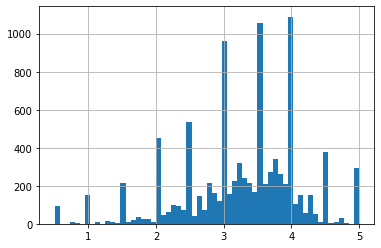

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings_avg['rating'].hist(bins=60)

## We can see that most of the movies are rated between 3 and 4. 

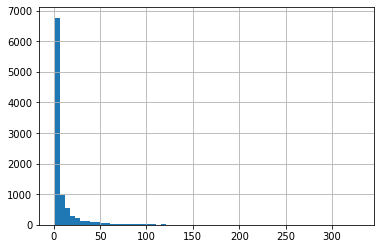

In [10]:
ratings_avg['number_of_ratings'].hist(bins=60)

## Most movies have number of ratings less than 50 times.

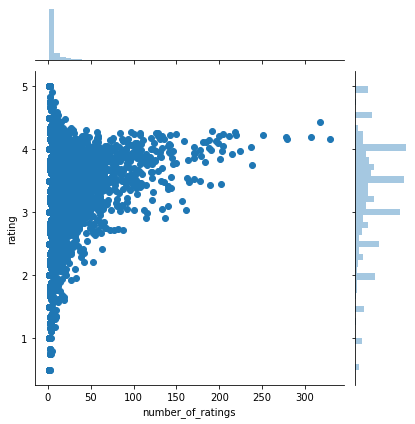

In [11]:
import seaborn as sns
sns.jointplot(x='number_of_ratings', y='rating', data=ratings_avg)

## It seems that there is a postive relationship between number of ratings and rating scores. That is to say, the more ratings a movie gets the higher average rating score it could get.

In [12]:
user_movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
user_movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sort movies by number of ratings

In [13]:
ratings_avg.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


## Let us pick out the top 2 movies 'Forrest Gump (1994)' and 'Shawshank Redemption, The (1994) ' to find out which movie in our database has the highest similarity to them respectively.

In [14]:
FG_user_rating = user_movie_matrix['Forrest Gump (1994)']
SR_user_rating = user_movie_matrix['Shawshank Redemption, The (1994)']

In [15]:
similar_to_FG = user_movie_matrix.corrwith(FG_user_rating,axis=0, drop=False, method='pearson')
similar_to_FG.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [16]:
similar_to_SR = user_movie_matrix.corrwith(SR_user_rating, axis=0, drop=False, method='pearson')
similar_to_SR.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

## Store the correlations into dataframes respectively

In [17]:
corr_SR = pd.DataFrame(similar_to_SR, columns=['Correlation'])
# Remove rows which have missing values
corr_SR.dropna(inplace=True)
corr_SR.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Principal, The (1987)",1.0
Chi-Raq (2015),1.0
Rififi (Du rififi chez les hommes) (1955),1.0
Robot & Frank (2012),1.0
Rock Star (2001),1.0
Catch a Fire (2006),1.0
"Cat in the Hat, The (2003)",1.0
Cars 2 (2011),1.0
Runaway (1984),1.0


In [18]:
corr_FG = pd.DataFrame(similar_to_FG, columns=['Correlation'])
# Remove rows which have missing values
corr_FG.dropna(inplace=True)
corr_FG.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


## These two dataframes above show us 10 movies that are most similar to 'Forrest Gump' and 'Shawshank Redemption' respectively. But in real world, most of the movies are rated less than 50 times, which could affect our result heavily. So Let's filter out moives been rated over 50 times.


In [19]:
corr_FG = corr_FG.join(ratings_avg['number_of_ratings'])
corr_SR = corr_SR.join(ratings_avg['number_of_ratings'])

In [20]:
corr_FG.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [21]:
corr_FG[corr_FG['number_of_ratings'] >= 50].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
"Few Good Men, A (1992)",0.517146,57
Field of Dreams (1989),0.503845,56
Big (1988),0.492351,91
Hook (1991),0.484676,53


In [22]:
corr_SR[corr_SR['number_of_ratings'] >= 50].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Rear Window (1954),0.545149,84
My Cousin Vinny (1992),0.523016,59
Bad Boys (1995),0.516762,51
City of God (Cidade de Deus) (2002),0.486670,75
"Christmas Story, A (1983)",0.475801,55
"Lock, Stock & Two Smoking Barrels (1998)",0.472598,67
Lady and the Tramp (1955),0.468373,55
Grumpier Old Men (1995),0.466380,52


## Conclusion

### Those two dataframes above give us decent recommendations related to two movies that we have picked. However, this method has one big drawback: If a movie is rated below 50 times, it will never be recommended. Even though we could lower the threshhold to 10 or 5 times, we can't recommend a movie that has no rating at all. 

# Content-Based Filtering (Cosine Similarity)

## Create term-document matrix for genre

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf = TfidfVectorizer(ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = Tfidf.fit_transform(movies['genres'])

## Calculate cosine similarity

In [24]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [25]:
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_20_sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in top_20_sim_scores]
    return titles.iloc[movie_indices]

In [26]:
genre_recommendations('Forrest Gump (1994)').head(10)

1730           Life Is Beautiful (La Vita è bella) (1997)
2262                  Train of Life (Train de vie) (1998)
6296    Tiger and the Snow, The (La tigre e la neve) (...
6624    I Served the King of England (Obsluhoval jsem ...
346                            Colonel Chabert, Le (1994)
702                             Gone with the Wind (1939)
886                           English Patient, The (1996)
1421                         From Here to Eternity (1953)
1532                                Doctor Zhivago (1965)
2051                                  Barry Lyndon (1975)
Name: title, dtype: object

In [27]:
genre_recommendations('Shawshank Redemption, The (1994)').head(10)

29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
33                               Dead Man Walking (1995)
86                               Hate (Haine, La) (1995)
102                Young Poisoner's Handbook, The (1995)
211                            Heavenly Creatures (1994)
245                              New Jersey Drive (1995)
251                            Once Were Warriors (1994)
277                     Shawshank Redemption, The (1994)
348                                 Jason's Lyric (1994)
354                                 Above the Rim (1994)
Name: title, dtype: object

## Conclusion

### This method is more like Content-Based Filtering with coefficient correlation, the only difference is that it uses cosine similarity realted to movie genres to calculate the similarity between each movie.

# Memory-Based Collaborative Filtering (User-User & Movie-Movie)

## Collaborative filtering models assuming that people like similar things and people with similar tastes like similar things. 

## Because of memory limit of my laptop, I have to randomly chose 30,000 ratings out of 100,836 ratings to build my model.

In [28]:
np.random.seed(42)
index = np.arange(len(df))
random_inds = np.random.choice(index, size = 30000,replace = False)
df2 = df.loc[random_inds,].reset_index()

In [29]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df2, test_size=0.2)

In [30]:
train_df.head()

,index,userId,movieId,rating,timestamp,title,genres
26909,6477,96,1097,4.0,964773672,E.T. the Extra-Terrestrial (1982),Children|Drama|Sci-Fi
9638,10829,166,2028,4.5,1189038178,Saving Private Ryan (1998),Action|Drama|War
8614,49734,275,3741,5.0,1049078140,Badlands (1973),Crime|Drama|Thriller
15385,72061,474,3360,3.5,1132423135,Hoosiers (a.k.a. Best Shot) (1986),Drama|Romance
28617,83222,274,3452,2.0,1171786290,Romeo Must Die (2000),Action|Crime|Romance|Thriller


In [31]:
# Create two user-movie-rating matrices
train_df_matrix = train_df.as_matrix(columns = ['userId', 'movieId', 'rating'])
test_df_matrix = test_df.as_matrix(columns = ['userId', 'movieId', 'rating'])

In [32]:
train_df_matrix

array([[9.6000e+01, 1.0970e+03, 4.0000e+00],
       [1.6600e+02, 2.0280e+03, 4.5000e+00],
       [2.7500e+02, 3.7410e+03, 5.0000e+00],
       ...,
       [2.0200e+02, 6.1000e+02, 4.0000e+00],
       [2.7400e+02, 1.2410e+03, 3.5000e+00],
       [5.9900e+02, 7.9702e+04, 2.5000e+00]])

In [33]:
test_df_matrix

array([[2.19000e+02, 5.92000e+02, 3.50000e+00],
       [1.35000e+02, 4.85000e+02, 5.00000e+00],
       [5.99000e+02, 1.70355e+05, 4.50000e+00],
       ...,
       [2.72000e+02, 8.97450e+04, 4.00000e+00],
       [4.90000e+02, 8.04630e+04, 4.00000e+00],
       [3.51000e+02, 8.95000e+03, 4.00000e+00]])

## Calculate coefficient corelation similarity matrix for test data

In [34]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_corr_matrix = 1 - pairwise_distances(train_df_matrix, metric='correlation')
user_corr_matrix[np.isnan(user_corr_matrix)] = 0
# Moive Similarity Matrix
movie_corr_matrix = 1 - pairwise_distances(train_df_matrix.T, metric='correlation')
movie_corr_matrix[np.isnan(movie_corr_matrix)] = 0

In [35]:
# Function to predict ratings by similar user or similar movie
def predict_rating(ratings, sim, method ='user'):
    if method == 'user':
        mean_user_ratings = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_ratings[:, np.newaxis])
        pred = mean_user_ratings[:, np.newaxis] + sim.dot(ratings_diff) / np.array([np.abs(sim).sum(axis=1)]).T
    elif method == 'movie':
        pred = ratings.dot(sim) / np.array([np.abs(sim).sum(axis=1)])
    return pred

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

user_prediction = predict_rating(train_df_matrix, user_corr_matrix, method='user')
movie_prediction = predict_rating(train_df_matrix, movie_corr_matrix, method='movie')
# RMSE on the trainning data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_df_matrix)))
print('Movie-based CF RMSE: ' + str(rmse(movie_prediction, train_df_matrix)))

User-based CF RMSE: 16545.559661951647
Movie-based CF RMSE: 44.57056419264192


## According to my rmse score, Movie-based Collaborative Filtering seems better than User-based Collaborative Filtering for this particular training dataset.

# Model-Based Collaborative Filtering

In [37]:
# Read files
ratings = pd.read_csv('ratings.csv')

movies = pd.read_csv('movies.csv')

## Create user-movie matrix

In [38]:
Ratings_df = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
Ratings_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
Ratings_matrix = Ratings_df.as_matrix()
user_ratings_mean = np.mean(Ratings_matrix, axis = 1)
Ratings_demeaned = Ratings_matrix - user_ratings_mean.reshape(-1, 1)

## Set up svd parameters

In [40]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [41]:
sigma = np.diag(sigma)

In [42]:
all_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [43]:
pred = pd.DataFrame(all_predicted_ratings, columns = Ratings_df.columns)
pred.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.167328,0.402751,0.840184,-0.076281,-0.551337,2.504091,-0.890114,-0.026443,0.196974,1.593259,...,-0.023453,-0.019967,-0.026939,-0.026939,-0.023453,-0.026939,-0.023453,-0.023453,-0.023453,-0.058732
1,0.211459,0.006658,0.033455,0.017419,0.183430,-0.062473,0.083037,0.024158,0.049330,-0.152530,...,0.019498,0.016777,0.022219,0.022219,0.019498,0.022219,0.019498,0.019498,0.019498,0.032281
2,0.003588,0.030518,0.046393,0.008176,-0.006247,0.107328,-0.012416,0.003779,0.007297,-0.059362,...,0.005909,0.006209,0.005610,0.005610,0.005909,0.005610,0.005909,0.005909,0.005909,0.008004
3,2.051549,-0.387104,-0.252199,0.087562,0.130465,0.270210,0.477835,0.040313,0.025858,-0.017365,...,0.004836,0.004172,0.005500,0.005500,0.004836,0.005500,0.004836,0.004836,0.004836,-0.023311
4,1.344738,0.778511,0.065749,0.111744,0.273144,0.584426,0.254930,0.128788,-0.085541,1.023455,...,-0.008042,-0.007419,-0.008664,-0.008664,-0.008042,-0.008664,-0.008042,-0.008042,-0.008042,-0.010127


## Make 20 recommendations for user 100

In [44]:

userID = 100
num_recommend = 20
user_index = userID - 1 # User ID starts at 1, not 0
sorted_user_predictions = pred.iloc[user_index].sort_values(ascending=False)


user_data = ratings[ratings.userId == (userID)]
already_rated = (user_data.merge(movies, how = 'left', left_on = 'movieId', right_on = 'movieId').sort_values(['rating'], ascending=False))

print ('User {0} has already rated {1} movies.'.format(userID, already_rated.shape[0]))
print ('Recommending highest {0} predicted ratings movies not already rated by the user.'.format(num_recommend))


# Recommend the highest predicted ratings movies that the user has never rated before.

recommendations = (movies[~movies['movieId'].isin(already_rated['movieId'])].
     merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',left_on = 'movieId',right_on = 'movieId').
     rename(columns = {user_index: 'Predictions'}).
     sort_values('Predictions', ascending = False).iloc[:num_recommend, :-1])




User 100 has already rated 148 movies.
Recommending highest 20 predicted ratings movies not already rated by the user.


In [45]:

# Top 20 movies that User 100 has rated 
already_rated.head(20)

,userId,movieId,rating,timestamp,title,genres
86,100,1958,5.0,1100186258,Terms of Endearment (1983),Comedy|Drama
101,100,2423,5.0,1100186118,Christmas Vacation (National Lampoon's Christm...,Comedy
137,100,5620,5.0,1100186982,Sweet Home Alabama (2002),Comedy|Romance
55,100,1101,5.0,1100184137,Top Gun (1986),Action|Romance
125,100,4041,5.0,1100184235,"Officer and a Gentleman, An (1982)",Drama|Romance
70,100,1307,4.5,1100183745,When Harry Met Sally... (1989),Comedy|Romance
84,100,1912,4.5,1100186251,Out of Sight (1998),Comedy|Crime|Drama|Romance|Thriller
82,100,1777,4.5,1100184536,"Wedding Singer, The (1998)",Comedy|Romance
81,100,1680,4.5,1100184264,Sliding Doors (1998),Drama|Romance
80,100,1678,4.5,1100186254,"Joy Luck Club, The (1993)",Drama|Romance


In [46]:
# Top 20 movies that User 100 has not rated and may like
recommendations

,movieId,title,genres
1202,1704,Good Will Hunting (1997),Drama|Romance
895,1259,Stand by Me (1986),Adventure|Drama
409,500,Mrs. Doubtfire (1993),Comedy|Drama
358,440,Dave (1993),Comedy|Romance
1185,1682,"Truman Show, The (1998)",Comedy|Drama|Sci-Fi
29,39,Clueless (1995),Comedy|Romance
1991,2797,Big (1988),Comedy|Drama|Fantasy|Romance
112,150,Apollo 13 (1995),Adventure|Drama|IMAX
2082,2918,Ferris Bueller's Day Off (1986),Comedy
1209,1721,Titanic (1997),Drama|Romance


## Use surprise package Singular Value Decomposition (SVD) algorithm

In [47]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

svd = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8745  0.8726  0.8688  0.8771  0.8727  0.8731  0.0027  
Fit time          3.49    3.45    3.52    3.44    3.50    3.48    0.03    
Test time         0.14    0.09    0.13    0.09    0.14    0.12    0.02    


{'test_rmse': array([0.87447904, 0.87260721, 0.86878924, 0.87713173, 0.87268917]),
 'fit_time': (3.4933435916900635,
  3.4547855854034424,
  3.5185883045196533,
  3.435920238494873,
  3.5016350746154785),
 'test_time': (0.1386585235595703,
  0.08676862716674805,
  0.12865614891052246,
  0.08776545524597168,
  0.13962674140930176)}

## Average RMSE is 0.8476, which is a pretty good.

In [48]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [49]:
ratings[ratings['userId'] == 100]

,userId,movieId,rating,timestamp
15300,100,3,3.5,1100183804
15301,100,11,4.0,1100184041
15302,100,16,4.5,1100185959
15303,100,17,4.5,1100184147
15304,100,19,1.0,1100183757
...,...,...,...,...
15443,100,6785,4.5,1100184338
15444,100,6873,4.0,1100186781
15445,100,7149,3.5,1100184159
15446,100,8529,4.0,1100184289


## Let's try to predict user 100's rating on movie 3, 11 and 16

In [50]:
svd.predict(100, 3)

Prediction(uid=100, iid=3, r_ui=None, est=3.415633610656326, details={'was_impossible': False})

In [51]:
svd.predict(100, 11)

Prediction(uid=100, iid=11, r_ui=None, est=4.063957191168263, details={'was_impossible': False})

In [52]:
svd.predict(100, 16)

Prediction(uid=100, iid=16, r_ui=None, est=4.42213310126959, details={'was_impossible': False})

## Conclusion

### Those are very close predictions copmared with the original user ratings, there are definitly some method to improve our model. I will take this model as our baseline and improve it gradually in the future.